<br>
<h1 style = "font-size:60px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : #fe346e; text-align: center; border-radius: 100px 100px;">66 Days of Data<br>[03/07/2021] Day 1</h1>
<br>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:black; border:0' role="tab" aria-controls="home"><center>Quick Navigation</center></h3>

    
* [Dependencies](#1)
* [Configurations](#2)
* [Seeding](#3)
* [Loading Iris Data](#4)
* [Graphical Exploratory Data Analysis](#5)
    * [Histogram](#51)
    * [Bee Swarm Plot](#52)
    * [Empirical Cumulative Distribution Function](#53)
        * [ECDF vs CDF](#531)

<a id="1"></a>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Dependencies</h1>

In [1]:
# !pip install -U -q scikit-learn==0.24.2

import os
import random
import sys
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import torch

from sklearn.datasets import *

assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

<a id="2"></a>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Configurations</h1>

In [2]:
np.random.seed(42)

%matplotlib inline
sns.set(style="ticks")
plt.style.use("dark_background")

# mpl.rc('axes', labelsize=15)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Graphical Exploratory Data Analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<a id="3"></a>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Seeding</h1>

In [3]:
def seed_all(seed: int = 1930):
    """Seed all random number generators."""
    print("Using Seed Number {}".format(seed))

    os.environ["PYTHONHASHSEED"] = str(
        seed
    )  # set PYTHONHASHSEED env var at fixed value
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.cuda.manual_seed(seed)  # pytorch (both CPU and CUDA)
    np.random.seed(seed)  # for numpy pseudo-random generator
    random.seed(seed)  # set fixed value for python built-in pseudo-random generator
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.enabled = False


def seed_worker(_worker_id):
    """Seed a worker with the given ID."""
    worker_seed = torch.initial_seed() % 2 ** 32
    np.random.seed(worker_seed)
    random.seed(worker_seed)
    
seed_all(1992)

Using Seed Number 1992


<a id="4"></a>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Loading Iris Data</h1>

In [4]:
# import iris and load as dataframe
iris = load_iris(return_X_y=False, as_frame=True)

# make a copy of iris
df_iris = iris.frame.copy()

# change target to species and map 0,1,2 to species
df_iris.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
                   'petal width (cm)', 'species']  
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df_iris['species'] = df_iris['species'].map(species_mapping)

<a id="5"></a>

<h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">[1] Graphical Exploratory Data Analysis</h1>

<a id="51"></a>

<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Histogram</h2>

- Used for continuous data while bar charts are used for categorical data.

- To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

We used the square root rule to calculate the number of bins in the histogram below. It turns out that `int(n_bins)=7`. It is a nice number because if I set the x-tick step size to be 0.3, we can easily see that each interval contains how many such values. 

For example, we know that the `max(versicolor_petal_length)=5.1` and the `min(versicolor_petal_length)=3`. Therefore, the range is 2.1. We can divide 2.1 into 7 bins, where each interval is 0.3. This is why I chose the x-tick step size to be 0.3 earlier.

From the graph, it is now easy to interpret that there are 1 count from 3-3.3, 4 counts from 3.3-3.6 and so on.

You can uncomment `_ = plt.hist(x=versicolor_petal_length, bins=20, edgecolor='blue', linewidth=1.2)` below to see that when you increase the number of bins, your data representation seemingly change, which is one of the drawbacks of histograms.

Saving figure [Versicolor] Histogram Plot on Petal Length


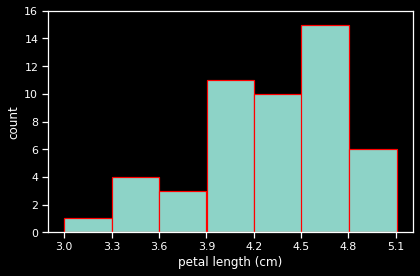

In [5]:
# get versicolor's petal length
versicolor_petal_length = df_iris.loc[df_iris['species'] ==
                                      'versicolor']['petal length (cm)'].to_numpy(dtype=np.float16, copy=False)

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(x=versicolor_petal_length, bins=n_bins, edgecolor='red', linewidth=1.2)
# _ = plt.hist(x=versicolor_petal_length, bins=20, edgecolor='blue', linewidth=1.2)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# setting x and y ticks to show a more granular level of x and y range.
# note carefully that np.arange does not include the stop value, except when my step size is in float (like the case below)
_ = plt.xticks(np.arange(start=min(versicolor_petal_length),
               stop=max(versicolor_petal_length), step=0.3))

_ = plt.yticks(np.arange(start=0,
                         stop=18, step=2))

# Save the plot
save_fig("[Versicolor] Histogram Plot on Petal Length")

# Show histogram
plt.show()

We can tell that there are more data clustered in between 3.9-4.8 cm.

<a id="52"></a>

<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Bee Swarm Plot</h2>

An additional problem with histograms is that we are not plotting all of the data. We are sweeping the data into bins, and losing their actual values. This means that we are not on a granular level when reading off histogram plots, instead, we are grouping data in terms of bins, like from this range to that range, how many data are within the said intervals. This can lead to what we mentioned on the point above - binning bias.

Bee Swarm Plot addresses this issue by plotting all data points of Iris dataset where x-axis is the species, and y-axis the petal length. This diagram below attempts to show all data points, linking back to the histogram previously, we can tell that for versicolor species, there are more data points clustered in between 4-4.75 cm (roughly the same as what we saw in histogram).

Saving figure [Iris] Bee Swarm Plot on Petal Length


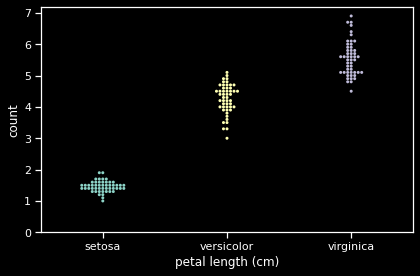

In [6]:
# get petal species and petal length
petal_species = df_iris['species']
petal_length = df_iris['petal length (cm)']

# _ = sns.swarmplot(x=petal_species, y = petal_length) same as below
# note that change marker size from 5 to 3 to avoid the plot warning on marker size too big
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df_iris, size=3)

# Label the axes
_ = plt.xlabel(xlabel='species')
_ = plt.ylabel(ylabel='petal length (cm)')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# setting x and y ticks to show a more granular level of x and y range.
_ = plt.yticks(np.arange(start=0,
                         stop=max(petal_length)+1, step=1))

# Save the plot
save_fig("[Iris] Bee Swarm Plot on Petal Length")

# Show the plot
plt.show()

<a id="53"></a>

<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Empirical Cumulative Distribution Function</h2>

An ECDF is an estimator of the Cumulative Distribution Function. To read it, it is similar to the idea of percentiles.

To code it in python:

1. sort the data in ascending order
2. calculate the number of samples in the data
3. calculate the y-axis in a binning manner: start from 0, with increment of 1/n until it reaches 1.

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
   
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y

    y =  np.arange(start=1, stop=n+1)/n
    
    return x, y

Saving figure [Iris] ECDF Plot on Petal Length


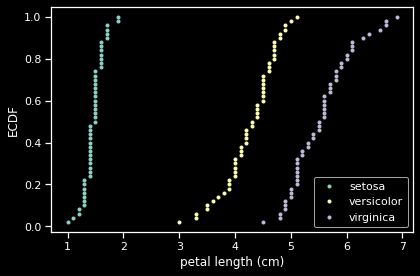

In [8]:
versicolor_petal_length = df_iris.loc[df_iris['species'] ==
                                      'versicolor']['petal length (cm)'].to_numpy(dtype=np.float16, copy=False)
setosa_petal_length = df_iris.loc[df_iris['species'] ==
                                      'setosa']['petal length (cm)'].to_numpy(dtype=np.float16, copy=False)
virginica_petal_length = df_iris.loc[df_iris['species'] ==
                                      'virginica']['petal length (cm)'].to_numpy(dtype=np.float16, copy=False)


# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)


# Plot all ECDFs on the same plot

_ = plt.plot(x_set, y_set, marker=".", linestyle='none')
_ = plt.plot(x_vers, y_vers, marker=".", linestyle='none')
_ = plt.plot(x_virg, y_virg, marker=".", linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Save the plot
save_fig("[Iris] ECDF Plot on Petal Length")

# Display the plot
plt.show()

To understand the graph above, let us just look at **versicolor** for consistency. In simple terms, the ECDF of this species can be interpreted as follows: what percentage of **versicolor** have a **petal length** of less than 4 cm? By eyeballing, we can tell that about $20\%$ just by pinpointing which value on the y-axis (ECDF) corresponds to 4 cm on the x-axis (petal length).

<a id="531"></a>

<h3 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">ECDF vs CDF</h3>

Let $X$ be a random variable.

 - The cumulative distribution function $F(x)$ gives the $P(X \leq x)$.
 - An empirical cumulative distribution function function $G(x)$ gives $P(X \leq x)$ based on the observations in your sample.

The distinction is which probability measure is used. For the empirical CDF, you use the probability measure defined by the frequency counts in an empirical sample. 

**Simple example (coin flip):**

Let $X$ be a random variable denoting the result of a single coin flip where $X=1$ denotes heads and $X=0$ denotes tails.

The CDF for a fair coin is given by:
$$ F(x) = \left\{ \begin{array}{ll} 0 & \text{for } x < 0\\ \frac{1}{2} & \text{for } 0 \leq x < 1 \\1 & \text{for } 1 \leq x \end{array}  \right. $$

If you flipped 2 heads and 1 tail, the empirical CDF would be:
$$ G(x) = \left\{ \begin{array}{ll} 0 & \text{for } x < 0\\ \frac{2}{3} & \text{for } 0 \leq x < 1 \\1 & \text{for } 1 \leq x \end{array}  \right. $$

The empirical CDF would reflect that in your sample, $2/3$ of your flips were heads.

**Another example ($F$ is CDF for normal distribution):**

Let $X$ be a normally distributed random variable with mean $0$ and standard deviation $1$.

The CDF is given by:

$$F(x) = \int_{-\infty}^x \frac{1}{\sqrt{2\pi}} e^{\frac{-x^2}{2}}$$

Let's say you had 3 IID draws and obtained the values $x_1 < x_2 < x_3$. The empirical CDF would be:
$$ G(y) = \left\{ \begin{array}{ll} 0 & \text{for } y < x_1\\ \frac{1}{3} & \text{for } x_1 \leq y < x_2 \\\frac{2}{3} & \text{for } x_2 \leq y < x_3 \\1 & \text{for } x_3 \leq y  \end{array}  \right. $$

With enough IID draws (and certain regularity conditions are satisfied), the empirical CDF would converge on the underlying CDF of the population.
